# Question 1:Time Series Analysis


In [1]:
# import the importent libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set plot style
plt.style.use('seaborn')

# Set plot size
plt.rcParams['figure.figsize'] = [8,6]

In [3]:
# Load the data from a CSV file
df=pd.read_csv('dataset/euro-daily-hist_1999_2022.csv')

In [4]:
#See first 5 variables 
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957


In [5]:
# Print the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

In [6]:
#Seeing shape of dataframe
df.shape

(6022, 41)

In [7]:
#Checking if any null values the DataFrame has
df.isnull().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3676
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           2892
[UK pound sterling ]           0
[Greek drachma ]            5502
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         1863
[Latvian lats ]             2118
[Maltese lira ]             3676
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

The Dataset has plentty of null values but the Turkish Lira column only has 62 which makes the time series less interrupted 

In [8]:
#Renaming the columns 

df.rename(columns={'[Turkish lira ]': 'Turkish_Lira',
                               'Period\\Unit:': 'Date'},
                      inplace=True)

# Store the 'Date' column into dataframe 'djia_df'
df['Date'] = pd.to_datetime(df['Date'])

#Sort values from earlier to latest 
df.sort_values('Date', inplace=True)

#Print the first two variables
df.head(2)

,Date,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],Turkish_Lira,[US dollar ],[South African rand ]
6021,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6020,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


For better experiences the Time column and the value columns name was changed 

In [9]:
#Copy the new dataframe from the original dataframe
EU_TL=df[['Date','Turkish_Lira']].copy()

In [10]:
# Attach your own 'Data' index to the dataframe
EU_TL.index = EU_TL['Date']

# Drop the 'Date' column from the dataframe
EU_TL.drop('Date', axis = 1, inplace = True)
EU_TL.head(5)

,Turkish_Lira
Date,
1999-01-04,0.3723
1999-01-05,0.3728
1999-01-06,0.3722
1999-01-07,0.3701
1999-01-08,0.3718


In [11]:
# Drop null values from the dataframe
EU_TL.dropna(inplace=True)
# Display the sum of null values
EU_TL.isnull().sum()

Turkish_Lira    0
dtype: int64

In [12]:
#See the min and max values 
EU_TL.index.min(),EU_TL.index.max()

(Timestamp('1999-01-04 00:00:00'), Timestamp('2022-04-08 00:00:00'))

In [13]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

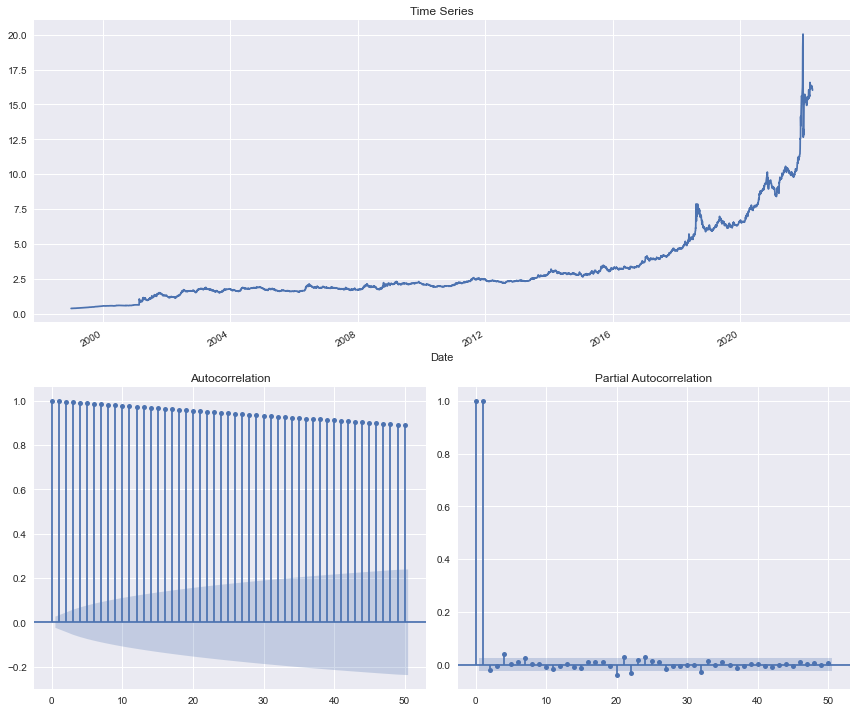

In [14]:
## Display plot of Turkish_Lira column and Date index with ACF and PACF
plotds(EU_TL['Turkish_Lira'], nlag = 50)

The dataset has 20 years records so that the plot looks very squeshed together so that we wont be able to see more in the detail 

In [15]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result= adfuller(EU_TL.Turkish_Lira.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 4.130176
p-value: 1.000000


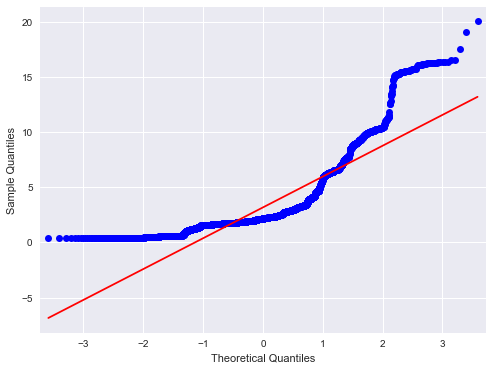

In [16]:
# qqplot for the 'Close' column
x = sm.qqplot(EU_TL['Turkish_Lira'], line = 's')

To be able to apply time series to the dataset, the data must be stationary. 
Stationarity is an important characteristic of time series. A time series is said to be
stationary if its statistical properties do not change over time. In other words, it has
constant mean and variance, and covariance is independent of time.(From class notes). We can check the plot with naked eye if the time series is stationary but it wont be accurate. The Dickey-Fuller test is one of most easy method to check if the datset is stationary.

The Augmented Dickey-Fuller test:

In [17]:
# Store one difference value of the 'Turkish_Lira' column
first_order_diff = EU_TL['Turkish_Lira'].diff(1)

# Display the first five records
first_order_diff.head()

Date
1999-01-04       NaN
1999-01-05    0.0005
1999-01-06   -0.0006
1999-01-07   -0.0021
1999-01-08    0.0017
Name: Turkish_Lira, dtype: float64

In [18]:
# Drop the first row of 'Turkish_Lira' column because It has 'NaN' value and assign to the new DataFrame 
first_order_diff=EU_TL['Turkish_Lira'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
1999-01-05    0.0005
1999-01-06   -0.0006
1999-01-07   -0.0021
1999-01-08    0.0017
1999-01-11    0.0007
Name: Turkish_Lira, dtype: float64

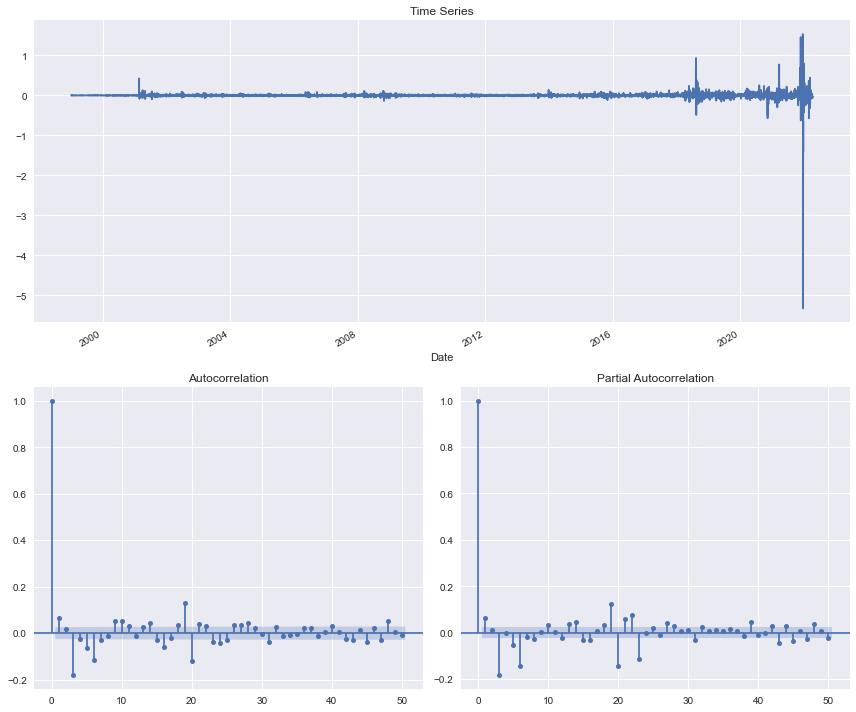

In [19]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

In [20]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result= adfuller(first_order_diff.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -12.929166
p-value: 0.000000


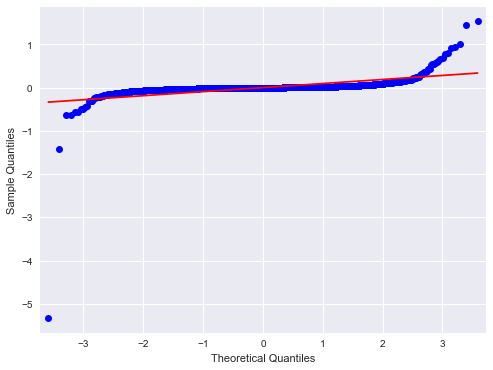

In [21]:
# qqplot for the 'Turkish Lira' column
x = sm.qqplot(first_order_diff, line = 's')

To make dataset stationary the firts differencing method from sklearn library was applied and then after that the time series become stationary as it can be seen on adfuller P-value and qqplot but the dataset is very squise together for that reason the dataset was resampled with monthly average to be able to see more in the detail.

In [22]:
# Resample the data to the average monthly values
data_monthly = EU_TL.resample("M").mean()

In [23]:
# Print the head of resampled data
data_monthly.head()

,Turkish_Lira
Date,
1999-01-31,0.376465
1999-02-28,0.384990
1999-03-31,0.395770
1999-04-30,0.408659
1999-05-31,0.422114


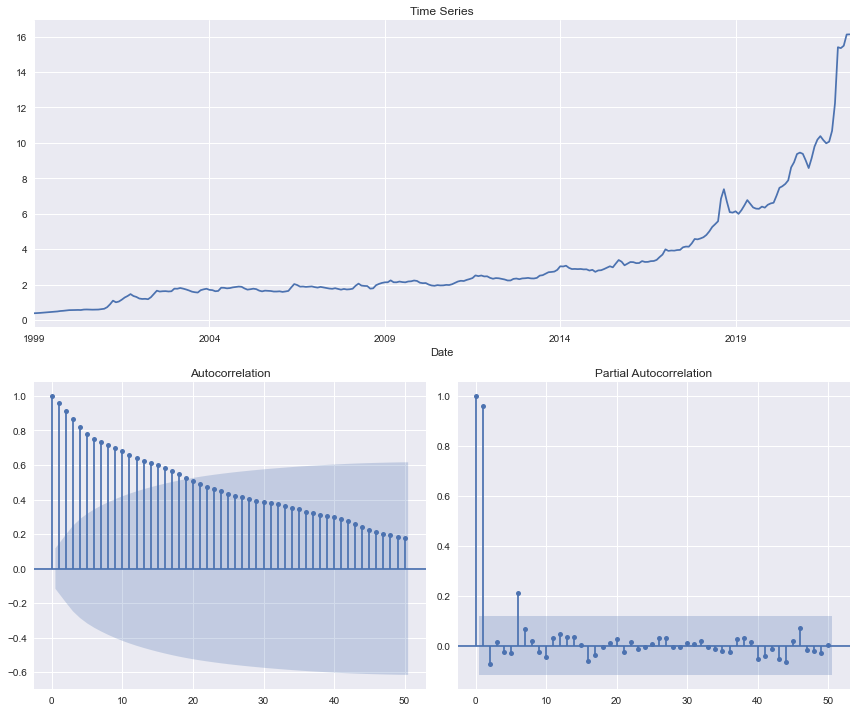

In [24]:
# Plot resampled data
plotds(data_monthly['Turkish_Lira'], nlag = 50)

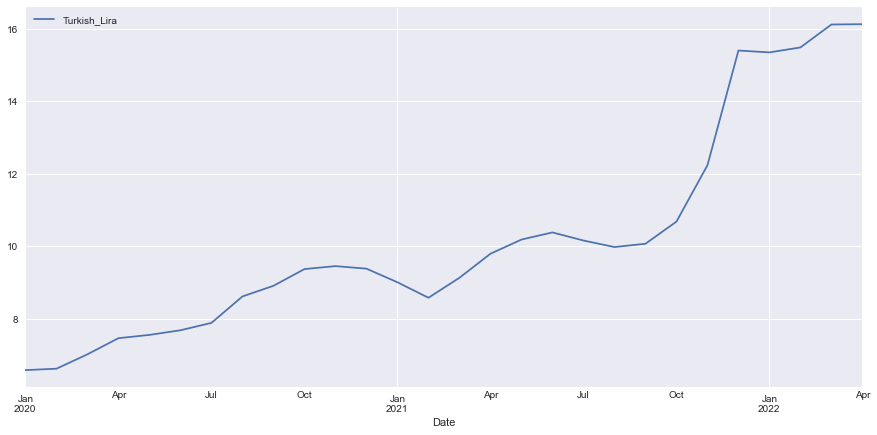

In [25]:
# Plot the data from 2020 to 2022 to be able to see covid effects 
covid=data_monthly["2020":"2022"].plot(figsize=(15,7))

to discover effect of covid on the Euro/ Turkish Lira rate closely 

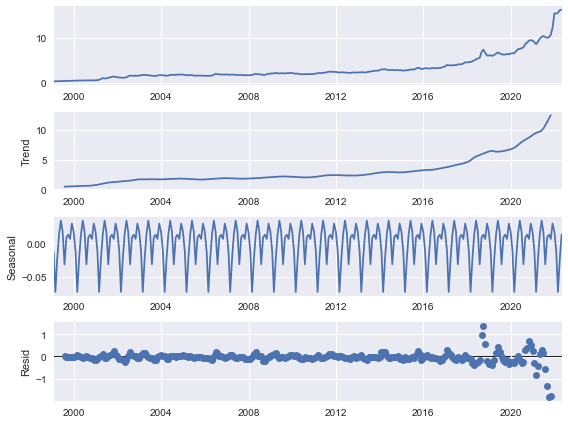

In [26]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot decomposed series
seasonal_decompose(data_monthly).plot();

 
statsmodels.tsa.seasonal.seasonal_decompose() takes a DataFrame and returns an object with attributes:

-trend
-seasonal
-resid 
each of them containing the time series that encodes the corresponding part of the original series,
and a method



In [27]:
#Create 4 differences and assigning to the datafarame 
data_monthly['diff_1']=data_monthly['Turkish_Lira'].diff(1)
data_monthly['diff_2']= data_monthly['Turkish_Lira'].diff(2)
data_monthly['diff_3']= data_monthly['Turkish_Lira'].diff(3)
data_monthly['diff_4']= data_monthly['Turkish_Lira'].diff(4)
data_monthly.head()

,Turkish_Lira,diff_1,diff_2,diff_3,diff_4
Date,,,,,
1999-01-31,0.376465,NaN,NaN,NaN,NaN
1999-02-28,0.384990,0.008525,NaN,NaN,NaN
1999-03-31,0.395770,0.010780,0.019305,NaN,NaN
1999-04-30,0.408659,0.012890,0.023669,0.032194,NaN
1999-05-31,0.422114,0.013455,0.026345,0.037124,0.045649


In [28]:
#Drop null values from differences columns
data_monthly.dropna(inplace=True)

In [29]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result= adfuller(data_monthly.diff_1.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 0.920939
p-value: 0.993358


In [30]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result= adfuller(data_monthly.diff_4.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 2.803448
p-value: 1.000000


After resampling the dataset, 4 differences were applied to make dataset stationary but the dataset could not be stationary as we can see on P-value.

In [31]:
#Applying log function to the monthly resample dataframe 
data_monthly['TL_log']=np.log(data_monthly['Turkish_Lira'])

In [32]:
#Printing first five variables 
data_monthly.head(5)


,Turkish_Lira,diff_1,diff_2,diff_3,diff_4,TL_log
Date,,,,,,
1999-05-31,0.422114,0.013455,0.026345,0.037124,0.045649,-0.862479
1999-06-30,0.430309,0.008195,0.021650,0.034540,0.045319,-0.843252
1999-07-31,0.443436,0.013127,0.021322,0.034777,0.047667,-0.813201
1999-08-31,0.464241,0.020805,0.033932,0.042127,0.055582,-0.767352
1999-09-30,0.478655,0.014414,0.035218,0.048345,0.056540,-0.736776


<AxesSubplot:xlabel='Date'>

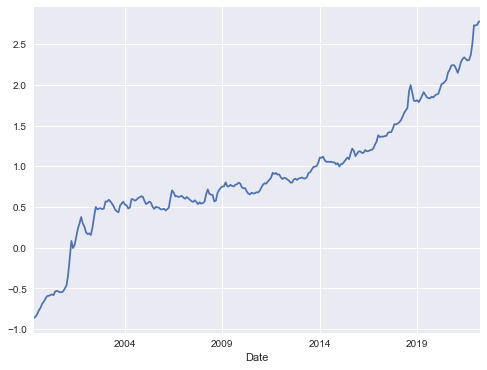

In [33]:
#Plotting Monthly resampled dataframe with 'TL_log' feature
data_monthly['TL_log'].plot()

In [34]:
# Store 'TL_log_diff' with one difference value of TL_log column
data_monthly['TL_log_diff']=data_monthly['TL_log'].diff()

<AxesSubplot:xlabel='Date'>

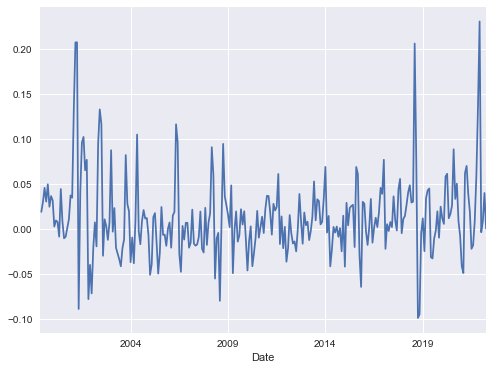

In [35]:
## Plot TL_log_diff feature with Date index
data_monthly['TL_log_diff'].plot()

In [36]:
# Drop the first row of 'TL_log_diff' column because It has 'NaN' value

data_monthly.dropna(subset = ["TL_log_diff"], inplace = True)

# Show first five records
data_monthly.head()

,Turkish_Lira,diff_1,diff_2,diff_3,diff_4,TL_log,TL_log_diff
Date,,,,,,,
1999-06-30,0.430309,0.008195,0.021650,0.034540,0.045319,-0.843252,0.019228
1999-07-31,0.443436,0.013127,0.021322,0.034777,0.047667,-0.813201,0.030051
1999-08-31,0.464241,0.020805,0.033932,0.042127,0.055582,-0.767352,0.045849
1999-09-30,0.478655,0.014414,0.035218,0.048345,0.056540,-0.736776,0.030576
1999-10-31,0.503100,0.024445,0.038859,0.059664,0.072791,-0.686966,0.049810


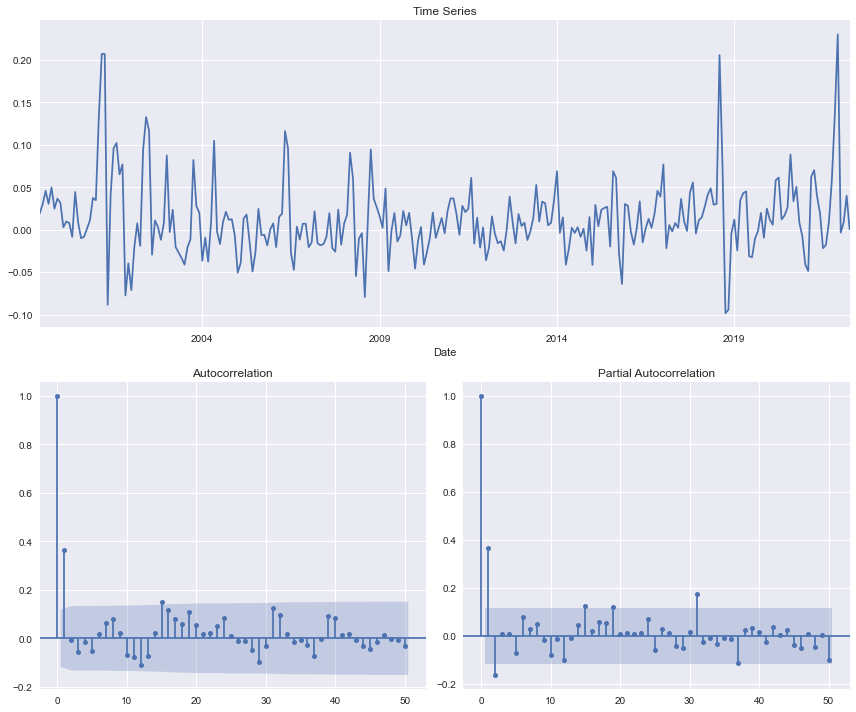

In [37]:
# Plot resampled data
plotds(data_monthly['TL_log_diff'], nlag = 50)

ACF plot is a bar chart of coefficients of correlation between a time series and it lagged values.
PACF is the partial autocorrelation function that explains the partial correlation between the series and lags of itself.

In our model for ACF lag 1 is significant on other hand in the PACF lag 1,3 and 32 are significant.

In [38]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result= adfuller(data_monthly['TL_log_diff'].tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -10.895482
p-value: 0.000000


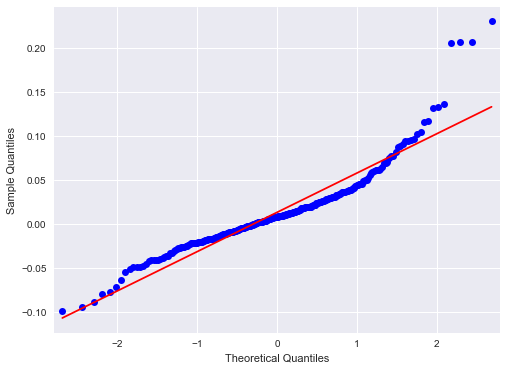

In [39]:
# qqplot for the 'TL_log_diff' column
x = sm.qqplot(data_monthly['TL_log_diff'], line = 's');

After appliying 4 failed differences to make dataset stationary, there is another methot called log function were applied and the new column is called 'TL_log' then first differences applied to 'TL_log' which is stored in 'TL_log_diff' variable, now the dataset is stationary.

As we can see the time series is stationary on Dickey Fuller test as well.

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the model equation. alpha is the coefficient of the first lag on Y.

Null Hypothesis (H0): alpha=1


Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not.

As the name suggest, the ADF test is an ‘augmented’ version of the Dickey Fuller test.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.


In [40]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(data_monthly['Turkish_Lira'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 58.92003581663309], [0, 1, 1, 4.574842075680181], [0, 1, 2, 6.3667764191441165], [1, 1, 0, 11.873448073200962], [1, 1, 1, 6.340515196354431], [1, 1, 2, 3.3349958087635514], [2, 1, 0, 8.338545246190051], [2, 1, 1, 8.136302429127568], [2, 1, 2, 10.135162621969812], [0, 2, 0, 106.94089464664395], [0, 2, 1, 40.49588174481892], [0, 2, 2, 1.7298375171274074], [1, 2, 0, 97.89250634261714], [2, 2, 0, 67.69595016077756], [2, 2, 1, 3.478214290410506], [2, 2, 2, 3.514685946787722]]


In [41]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(data_monthly.TL_log_diff.tolist(), order = (0, 2, 2))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit(disp = 0)

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  273
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 457.808
Method:                       css-mle   S.D. of innovations              0.044
Date:                Fri, 03 Jun 2022   AIC                           -907.617
Time:                        21:21:31   BIC                           -893.179
Sample:                             2   HQIC                          -901.821
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.701e-06   9.42e-07      3.926      0.000    1.85e-06    5.55e-06
ma.L1.D2.y    -1.9921      0.012   -169.119      0.000      -2.015      -1.969
ma.L2.D2.y     0.9922      0.012     83.948      0.000       0.969       1.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0039           -0.0047j            1.0039           -0.0007
MA.2            1.0039           +0.0047j            1.0039            0.0007
-----------------------------------------------------------------------------
"""

After making the dataset stationary, there is a loop create to find AIC.

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same dataset. A lower AIC score is better.

After finding the lowest AIC model the ARIMA model was applied;

Our best fit model is ARIMA(0,2,2), it means d=2 (second order differencing) and q=2 is the MA (moving-average) order.

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA(p,d,q)

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

In [42]:
# Declare the array 'pred' and append the values 
pred = np.append([0, 0], arima_obj_fit.fittedvalues.tolist())

# Add a new column 'ARIMA' into dataframe
data_monthly['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
TL_log_diff = np.append([0, 0], arima_obj_fit.resid + arima_obj_fit.fittedvalues)

# Add a column 'diffval' into dataframe
data_monthly['TL_log_diff'] = TL_log_diff

# Display first five records
data_monthly.head()

,Turkish_Lira,diff_1,diff_2,diff_3,diff_4,TL_log,TL_log_diff,ARIMA
Date,,,,,,,,
1999-06-30,0.430309,0.008195,0.021650,0.034540,0.045319,-0.843252,0.000000,0.000000
1999-07-31,0.443436,0.013127,0.021322,0.034777,0.047667,-0.813201,0.000000,0.000000
1999-08-31,0.464241,0.020805,0.033932,0.042127,0.055582,-0.767352,0.004976,0.000004
1999-09-30,0.478655,0.014414,0.035218,0.048345,0.056540,-0.736776,-0.031073,-0.003311
1999-10-31,0.503100,0.024445,0.038859,0.059664,0.072791,-0.686966,0.034508,0.028594


Text(0, 0.5, 'Turkish Lira')

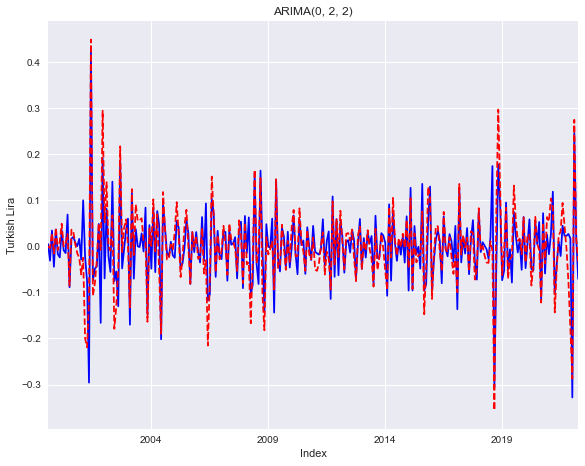

In [43]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(9.5, 7.5)

# Ignore first two rows because of difference factor d = 2
data_monthly['TL_log_diff'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
data_monthly['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 2)')
plt.xlabel('Index')
plt.ylabel('Turkish Lira')

Above figure it is storing arima numbers and TL_log_diff values on the time series.

Text(0, 0.5, 'Forecasted value')

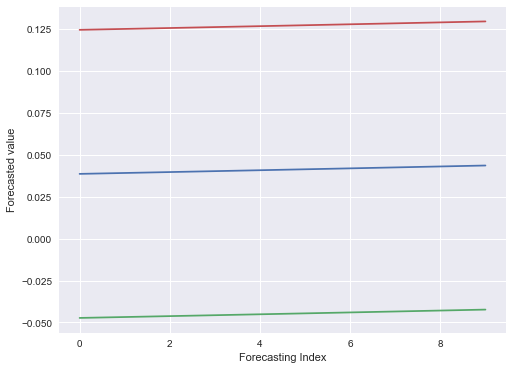

In [44]:
## The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure
f, err, ci = arima_obj_fit.forecast(10)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')


forecasting next 10 element of dataset time series and forecasted values are with 95 percent confidence level

# Question 2: Recommendation system

# Content-Based Recommender System

In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [2]:
## Load the data from a CSV file
book_df=pd.read_csv('dataset/Books.csv',low_memory=False)

In [3]:
#see the first 5 records
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [46]:
#Print the shape of datset
book_df.shape

(271360, 8)

In [47]:
#Drop duplicates
book_df = book_df.drop_duplicates()

In [48]:
#After dropping buplicates print shape again 
book_df.shape

(271360, 8)

In [49]:
#Rename columns 
book_df = book_df.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

In [50]:
#Print book Autors 
book_df['book_author']

0           Mark P. O. Morford
1         Richard Bruce Wright
2                 Carlo D'Este
3             Gina Bari Kolata
4              E. J. W. Barber
                  ...         
271355          Paula Danziger
271356              Teri Sloat
271357        Christine Wicker
271358                   Plato
271359     Christopher  Biffle
Name: book_author, Length: 271360, dtype: object

In [51]:
#Print title of books
book_df['book_title']

0                                       Classical Mythology
1                                              Clara Callan
2                                      Decision in Normandy
3         Flu: The Story of the Great Influenza Pandemic...
4                                    The Mummies of Urumchi
                                ...                        
271355                           There's a Bat in Bunk Five
271356                              From One to One Hundred
271357    Lily Dale : The True Story of the Town that Ta...
271358                          Republic (World's Classics)
271359    A Guided Tour of Rene Descartes' Meditations o...
Name: book_title, Length: 271360, dtype: object

In [52]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
book_df['book_author'] = book_df['book_author'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(book_df['book_author'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(271360, 47609)

In [53]:
# Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[1000:1010]

['aman',
 'amand',
 'amanda',
 'amando',
 'amann',
 'amar',
 'amara',
 'amarantha',
 'amarillas',
 'amarillo']

I used the text analytics to convert Book authors to numerical vectors you can observe that 47609 different vocabularies or words in our dataset.

In [54]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])

To handle high dimensions we only used the first 10000 records

In [55]:
#cosine_sim the first 10000 records shape
cosine_sim.shape

(10000, 10000)

In [56]:
#Simillarity outcome 
cosine_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

Now it is time to calculate similarity score. There are several similarity metrics that you can use for this, such as the manhattan, euclidean, the Pearson, and the cosine similarity scores. 

Here we used the cosine similarity to calculate a numeric quantity as relatively easy and fast to calculate and  cosine similarity denotes the similarity between two books. 

In [57]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(book_df.index, index=book_df['book_title']).drop_duplicates()

In [58]:
indices.head()

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
dtype: int64

In [59]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return book_df['book_title'].iloc[book_indices]

In [60]:
#Get recomendation for 'Clara Callan' 
get_recommendations('Clara Callan')

4287    Spy Catcher: The Candid Autobiography of a Sen...
6206                                         Going Native
3479          Poison Apples (Worldwide Library Mysteries)
5439    Amsterdam: Amsterdam and the Hague (Art in Focus)
173     Always Daddy's Girl: Understanding Your Father...
9427                                          Wildblossom
3141                                  Das letzte Konzert.
3722               The Peculiar Memories of Thomas Penman
2813    Guide to Korean Characters: Reading and Writin...
676                                            Globalhead
Name: book_title, dtype: object

# Collaborative Filtering

In [4]:
#Read datset with csv 
rating_df=pd.read_csv('dataset/Ratings.csv')

In [75]:
#printting the first 5 records
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
#Reading 'user_df' with csv 
user_df=pd.read_csv('dataset/Users.csv')

In [77]:
#printting the first 5 records
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
#printting the first 5 records of 'book_df' datset
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
rating_df.info(),book_df.info(),user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: obje

(None, None, None)

In [79]:
#Drop unnecessary columns from 'book_df'
book_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'])

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [80]:
#seeing the first 5 records after dropping the columns
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [81]:
#Seeing the shape of 3 datsets 
book_df.shape,user_df.shape,rating_df.shape

((271360, 8), (278858, 3), (1149780, 3))

In [82]:
#Merging datsets
data_1=book_df.merge(rating_df,how='left',on='ISBN')

In [83]:
combine_df=data_1.merge(user_df,how='left',on='User-ID')

In [84]:
#Seeing the first 5 recors of new merged datset
combine_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


In [85]:
#Rename columns 
combine_df=combine_df.rename(columns={'Book-Title':'Book_Title','Book-Author':'Book_Author','Book-Rating':'Book_Rating','User-ID':'User_ID'})

In [86]:
#After rename columns the first 5 records
combine_df.head()

,ISBN,Book_Title,Book_Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User_ID,Book_Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


In [87]:
#Shape of new datset 
combine_df.shape

(1032345, 12)

In [88]:
#drop null values
combine_df=combine_df.dropna()

In [89]:
##after drop null values the datset new shape
combine_df.shape

(753296, 12)

In [90]:
#book has more than 0 rating 
combine_df=combine_df[combine_df['Book_Rating']>0]

In [91]:
#after filtering rating to see the firts5 records
combine_df.head()

,ISBN,Book_Title,Book_Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User_ID,Book_Rating,Location,Age
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0,"toronto, ontario, canada",30.0
13,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,219008.0,7.0,"halifax, nova scotia, canada",60.0
14,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,263325.0,6.0,"fredericton, new brunswick, canada",27.0
16,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2954.0,8.0,"wichita, kansas, usa",71.0
17,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,152827.0,7.0,"ottawa, ontario, canada",40.0


In [92]:
#How many times have we read which book?
book_counts = pd.DataFrame(combine_df["Book_Title"].value_counts())

In [93]:
#Most read books
book_counts.sort_values("Book_Title", ascending=False)

,Book_Title
Wild Animus,473
The Lovely Bones: A Novel,473
The Da Vinci Code,380
The Secret Life of Bees,280
Bridget Jones's Diary,261
...,...
WEEPING ANGEL : WEEPING ANGEL,1
Was die Welt nicht braucht. Von Chatten bis Waschbrettbauch.,1
Knitting Masterpieces,1
I Don't Know What to Say,1


In [94]:
#We named the books with less than 50 reads as unpopular books.
unpopular_book = book_counts[book_counts["Book_Title"] <= 50].index

In [95]:
#By removing the rare books from the dataset, we found the widely read books
common_book = combine_df[~combine_df["Book_Title"].isin(unpopular_book)]
common_book.head()

,ISBN,Book_Title,Book_Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User_ID,Book_Rating,Location,Age
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526.0,9.0,"knoxville, tennessee, usa",26.0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398.0,9.0,"san antonio, texas, usa",37.0
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,67958.0,10.0,"idaho falls, idaho, usa",39.0
40,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,115097.0,7.0,"seattle, ,",27.0
54,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,230522.0,7.0,"colorado springs, colorado, usa",52.0


In [96]:
common_book.groupby('Book_Title')['Book_Rating'].count().reset_index()

,Book_Title,Book_Rating
0,1984,122
1,1st to Die: A Novel,152
2,2nd Chance,99
3,A Bend in the Road,98
4,A Case of Need,56
...,...,...
346,"Wizard and Glass (The Dark Tower, Book 4)",55
347,Wuthering Heights,51
348,Year of Wonders,57
349,Zen and the Art of Motorcycle Maintenance: An ...,56


In [97]:
#Creating pivot table 
user_book=pd.pivot_table(common_book,index='Book_Title',values='Book_Rating',columns='User_ID').fillna(0)

In [98]:
user_book.head()

User_ID,42.0,51.0,99.0,114.0,125.0,165.0,183.0,185.0,242.0,254.0,...,278683.0,278723.0,278755.0,278798.0,278800.0,278832.0,278836.0,278843.0,278844.0,278846.0
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
from scipy.sparse import csr_matrix

book_df_matrix = csr_matrix(user_book.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

I used KNN Unsupervised learner for implementing close neighbors together and in that model I used cosine similarity.

In [106]:
print(book_df_matrix)

  (0, 9)	9.0
  (0, 71)	10.0
  (0, 93)	8.0
  (0, 319)	8.0
  (0, 376)	5.0
  (0, 435)	6.0
  (0, 654)	9.0
  (0, 728)	8.0
  (0, 1021)	7.0
  (0, 1287)	10.0
  (0, 1425)	8.0
  (0, 1434)	10.0
  (0, 1656)	9.0
  (0, 1709)	9.0
  (0, 1732)	10.0
  (0, 1991)	10.0
  (0, 2113)	10.0
  (0, 2164)	9.0
  (0, 2208)	9.0
  (0, 2341)	7.0
  (0, 2366)	7.0
  (0, 2377)	8.0
  (0, 2413)	8.0
  (0, 2466)	10.0
  (0, 2622)	8.0
  :	:
  (350, 7844)	10.0
  (350, 7892)	6.0
  (350, 8401)	5.0
  (350, 8477)	8.0
  (350, 9153)	10.0
  (350, 9201)	7.0
  (350, 9220)	6.0
  (350, 9296)	4.0
  (350, 9364)	5.0
  (350, 9453)	8.0
  (350, 9638)	8.0
  (350, 9802)	5.0
  (350, 9976)	10.0
  (350, 9988)	8.0
  (350, 10086)	7.0
  (350, 10494)	10.0
  (350, 10717)	8.0
  (350, 10749)	5.0
  (350, 10997)	10.0
  (350, 11259)	6.0
  (350, 11372)	8.0
  (350, 11583)	9.0
  (350, 12240)	8.0
  (350, 12243)	9.0
  (350, 12323)	7.0


As our dataset is Sparse data it is data that has mostly unused elements like zero (elements that don't carry any information ) so that I used csr_matrix function to Compressed Sparse Row matrix.

In [102]:
user_book.shape

(351, 12446)

In [115]:
query_index = np.random.choice(user_book.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_book.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

326


I created random choice with one dimension option after that l created function with cosine similarity and cosine distance with distances and indices 

In [109]:
user_book.head()

User_ID,42.0,51.0,99.0,114.0,125.0,165.0,183.0,185.0,242.0,254.0,...,278683.0,278723.0,278755.0,278798.0,278800.0,278832.0,278836.0,278843.0,278844.0,278846.0
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_book.index[query_index]))
        
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_book.index[indices.flatten()[i]], distances.flatten()[i]))    
   

Recommendations for Snow Falling on Cedars:

1: While I Was Gone, with distance of 0.9088181484826949:
2: House of Sand and Fog, with distance of 0.9114447727102619:
3: White Oleander : A Novel (Oprah's Book Club), with distance of 0.9127648964849984:
4: Vinegar Hill (Oprah's Book Club (Paperback)), with distance of 0.9149089669034927:


# Question 3 : Market Basket Analysis

Some Terminologies:

Support, is the probability that a given item set appears in the data and it will fall in the range [0, 1].

The confidence metric can be thought of in terms of conditional probability, as it is basically the probability that product B is purchased given the purchase of product A. Same as Support it will fall in the range [0, 1].

Lift is the ratio of the observed support to that expected if the two rules were independent. The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.(From class notes)

In [3]:
#import importent libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [4]:
## Load the dataset
Grocery_df=pd.read_csv('dataset/Groceries_dataset.csv')

In [5]:
## Display the records
Grocery_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
#display shape of datset
Grocery_df.shape

(38765, 3)

In [7]:
Grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
Grocery_df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
Grocery_df['itemDescription'].nunique()

167

In [10]:
Grocery_df['Member_number'].nunique()

3898

In [11]:
# Remove any whote spaces or specified characters at the start and end of a string
Grocery_df['itemDescription']=Grocery_df['itemDescription'].str.strip()

# astype is a Pandas function for DataFrames (and numpy for numpy arrays) that will cast the object to the specified type
Grocery_df['itemDescription']=Grocery_df['itemDescription'].astype('str')


In [12]:
#Create and declare a method named as 'encode_units()
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [13]:
Grocery_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<AxesSubplot:xlabel='itemDescription'>

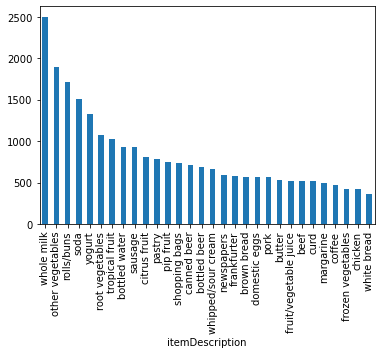

In [37]:
#to show the number of items sold in barchart 
Grocery_df.value_counts(ascending=False,subset='itemDescription').head(30).plot(kind='bar')

In [14]:
# store items within a new dataframe with groupby function 
basket=Grocery_df.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

In [15]:
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [17]:
#applying the function
basket_set = basket.applymap(encode_units)

In [18]:
basket_set.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
We applied the one hot encoding to dataset 

In [19]:
#basket=Grocery_df.groupby(['itemDescription'])

# Apriori Rule for Market Basket Analysis

In [56]:
# Evaluate the frequent item rules for apriori function
frequent_items_apr = apriori(basket_set, min_support = 0.05, use_colnames = True)

In [57]:
## Display the reles due to apriori algorithm
rules=association_rules(frequent_items_apr,metric='lift', min_threshold=1)
rules=rules.sort_values(['confidence','lift'],ascending=[False,False])
print(rules)

                           antecedents                         consequents  \
194  (bottled water, other vegetables)                        (whole milk)   
236         (yogurt, other vegetables)                        (whole milk)   
247               (rolls/buns, yogurt)                        (whole milk)   
206     (rolls/buns, other vegetables)                        (whole milk)   
254                     (yogurt, soda)                        (whole milk)   
..                                 ...                                 ...   
58                        (whole milk)                            (coffee)   
255                       (whole milk)                      (yogurt, soda)   
232                       (whole milk)  (tropical fruit, other vegetables)   
219                       (whole milk)         (sausage, other vegetables)   
46                        (whole milk)                           (chicken)   

     antecedent support  consequent support   support  confiden

In Apriori algorithm (whole milk) goes with  bottled water, other vegetables,yogurt, other vegetables and soda so we can see this from the Support, confidence(above 50%) and lift values(the value is bigger than 1 which is showing that some dependency exists between the items)

In [52]:
rules['lift'].max(),rules['confidence'].max()

(2.4286889871155837, 0.7843137254901961)

In [53]:
rules['lift'].min(),rules['confidence'].min()

(1.0001439344159704, 0.021836506159014557)

In [43]:
print('other vegetables',basket['other vegetables'].sum())
print('bottled water',basket['bottled water'].sum())
print('whole milk',basket['whole milk'].sum())
print('yogurt',basket['yogurt'].sum())

other vegetables 1898.0
bottled water 933.0
whole milk 2502.0
yogurt 1334.0


Also these figures showing the popularity these items which can be indicate to put them together as they are popular

# FP-growth algorithm for Market Basket Analysis

In [26]:
## Evaluate the frequent item rules for fpgrowth function
frequent_items_fb=fpgrowth(basket_set,min_support = 0.01, use_colnames = True)

In [35]:
## Display the reles due to fp-growth algorithm
rules_fb=association_rules(frequent_items_fb, metric='confidence',min_threshold=0.2,)
rules_fb=rules_fb.sort_values(['confidence','lift'],ascending=[False,False])

In [45]:
print(rules_fb)
#frequent_items.sort_values("support", ascending=False).head()

                                            antecedents      consequents  \
5117                              (domestic eggs, meat)     (whole milk)   
3021                 (chocolate, fruit/vegetable juice)     (whole milk)   
3273  (yogurt, other vegetables, rolls/buns, bottled...     (whole milk)   
2541                 (pip fruit, bottled water, yogurt)     (whole milk)   
4798                  (brown bread, rolls/buns, yogurt)     (whole milk)   
...                                                 ...              ...   
4743                                            (candy)  (shopping bags)   
5415                         (long life bakery product)      (pip fruit)   
2414                                        (pip fruit)   (citrus fruit)   
3183                      (margarine, other vegetables)   (citrus fruit)   
950                                   (misc. beverages)  (bottled water)   

      antecedent support  consequent support   support  confidence      lift  \
5117   

In the FP-growth algorithm it seems whole milk is being bought with domestic eggs, meat,chocolate and  fruit/vegetable juice.

Also nn the FP-growth algorithm,antecedents  are different such as domestic eggs, meat, chocolate etc and their confidences(above 70%) and lift are higher then Apriori algorithm items confidence(around 50%) and lift.


Referances:
    
Prabhakaran, S. (2019). Augmented Dickey Fuller Test (ADF Test) – Must Read Guide. [online] Machine Learning Plus. Available at: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/.

Zajic, A. (2019). Introduction to AIC — Akaike Information Criterion. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced.

Rocca, B. (2019). Introduction to recommender systems. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada#:~:text=The%20purpose%20of%20a%20recommender.
